first we need to define our model, and first thing is finding frictions and with zero motor acceleration.

In [3]:
# from Digital_twin import DigitalTwin
# import Digital_twin 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import butter, filtfilt
from mpl_toolkits.mplot3d import Axes3D
from Digital_twin import DigitalTwin


pygame 2.6.1 (SDL 2.28.4, Python 3.12.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [4]:
theta_180_1 = pd.read_csv('180_theta_1.csv')    # angle = 0
theta_180_2 = pd.read_csv('180_theta_2.csv')    # angle = 0
half_theta_1 = pd.read_csv('Half_theta.csv')    # angle = 90
half_theta_2 = pd.read_csv('Half_theta_2.csv')  # angle = 90
df = half_theta_2

csv_file_path = '/Users/alishirazi/Desktop/Master SSE/Smart Systems/Group team/Smart-syetems-labs/theta.csv'
df = pd.read_csv(csv_file_path)
df_time = df['pcTime'][20:] 
df_theta = df['theta'][20:]

In [6]:
df.head()

,pcTime,theta
0,440.875053,1.620957
1,465.658903,1.623490
2,490.717888,1.620194
3,515.764952,1.621682
4,540.741920,1.621421


In [7]:
df['delta_time'] = df['pcTime'].diff()
df.head(10)

,pcTime,theta,delta_time
0,440.875053,1.620957,NaN
1,465.658903,1.623490,24.783850
2,490.717888,1.620194,25.058985
3,515.764952,1.621682,25.047064
4,540.741920,1.621421,24.976969
5,565.711021,1.619409,24.969101
6,590.770006,1.622386,25.058985
7,615.640163,1.623379,24.870157
8,640.830040,1.623488,25.189877
9,665.774107,1.621940,24.944067


In [8]:
# remove first 25 rows
df = df.iloc[25:]
df = df.reset_index(drop=True)
df.head(10)

,pcTime,theta,delta_time
0,1065.764189,1.626420,24.923325
1,1090.785980,1.620608,25.021791
2,1115.662098,1.606659,24.876118
3,1140.820026,1.578059,25.157928
4,1165.663004,1.532589,24.842978
5,1190.650940,1.463628,24.987936
6,1215.684175,1.370558,25.033236
7,1240.729094,1.254740,25.044918
8,1265.723944,1.096253,24.994850
9,1290.772915,0.917881,25.048971


In [ ]:
# acc_x = df['xAccl'].values
# acc_y = df['yAccl'].values
# acc_z = df['zAccl'].values
# time = df['time'].values


In [ ]:

'''def butter_lowpass_filter(data, cutoff, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = filtfilt(b, a, data)
    return filtered_data

fs = 40  # 40 Hz sampling rate
cutoff = 3  # Filter out everything above 5 Hz

# Apply filter
filtered_acc_x = butter_lowpass_filter(acc_x, cutoff, fs)
filtered_acc_y = butter_lowpass_filter(acc_y, cutoff, fs)
filtered_acc_z = butter_lowpass_filter(acc_z, cutoff, fs)'''


In [ ]:
'''# convert readings to g
g = 9.8065
convertor = 1023 / g
acc_x_g = filtered_acc_x / convertor
acc_y_g = filtered_acc_y / convertor
acc_z_g = filtered_acc_z / convertor
dt = df['delta_time'].values/1000

'''

In [13]:
# Model parameters
g = 9.8065     # Acceleration due to gravity (m/s^2)
l = 0.4      # Length of the pendulum (m)
# c_air = 0.05    # Air friction coefficient --------> create a list for grid search
# c_c = 0.05      # Coulomb friction coefficient--------> create a list for grid search
mp = 1       # Mass of the pendulum (kg)
I = 0.00       # Moment of inertia of the pendulum (kg·m²)
future_motor_accelerations = []
future_motor_positions = []
future_motor_velocities = []
theta_list = []
theta_dot_list = []
# theta_dot = 0.

currentmotor_acceleration = 0.
currentmotor_velocity = 0.
time = 0.


In [ ]:
def find_initial_state(df_theta, df_time):
    # Find the initial conditions of theta and theta_dot in the data
    # theta = 92.0 * np.pi / 180  # Convert degrees to radians
    theta = df_theta[0]
    theta_dot = 0
    return theta, theta_dot

#Initial conditions based on the recorded data
theta, theta_dot = find_initial_state(df_theta, df_time)
#should be the same as your recording, sim_time is equal to total time of the recording
delta_t = 0.025  # Time step
sim_time = 0.025 * len(df_theta)  # Total time of the simulation

# Define improved parameter ranges with higher resolution
I_range = np.linspace(0.001, 0.4, 20)      # Reduced upper bound, increased resolution
c_c_range = np.linspace(0.001, 0.5, 40)    # Increased upper bound, increased resolution  
g = 9.81                                   # Gravity constant
mp_range = np.linspace(0.5, 2, 20)       # Expanded range in both directions, increased resolution


In [14]:
def get_theta_double_dot(theta, theta_dot, c_air, c_c):
    """
    Lab 1: Model the angular acceleration (theta_double_dot) 
    as a function of theta, theta_dot and the self.currentmotor_acceleration. 
    You should include the following constants as well: c_air, c_c, a_m, l and g. 
    """
    torque_gravity = -(mp * g * l / (I + mp * l**2)) * np.sin(theta)
    torque_air_friction = -(c_air / (I + mp * l**2)) * theta_dot
    torque_coulomb_friction = -(c_c / (I + mp * l**2)) * theta_dot
    # xdoubledot = a_m * R_pulley * currentmotor_acceleration
    # torque_motor = - (mp * l / (I + mp * l**2)) * xdoubledot * np.cos(theta)        
    angular_acceleration = torque_gravity + torque_air_friction + torque_coulomb_friction # + torque_motor
    return angular_acceleration


## completed block ( record all errors, c_air and c_c ):

In [15]:
measured_theta = np.array(df_theta)
measured_time = np.array(df_time)

In [ ]:

# Define parameter ranges
c_air_list = np.linspace(0.01, 1, 20)
c_c_list = np.linspace(0.01, 1, 20)
# dt = 0.025  # time step

# Define error function
def MSE(simulated, real):
    return np.sqrt(np.mean((simulated - real) ** 2))
# define error function
def err(simulated, real):
    return np.mean(np.abs((simulated - real)))

# Prepare for storing errors
error_grid = np.zeros((len(c_air_list), len(c_c_list)))
# real_theta_d_dot = acc_x_g  # From IMU, already in rad/s²

real_theta = np.array(df_theta)  # Real theta from the CSV file

best_error = float("inf")
best_parameters = (0, 0)

# theta = -np.pi/2  # Initial angle in radians
theta_sim = measured_theta[0]
delta_t = np.diff(df_time)  # Use actual time differences from data
dt = delta_t 
# theta_dot_sim = 0  # Initial angular velocity in radians/s

def grid_search(c_air_values, c_c_values, theta, delta_t):

    for i, c_air in enumerate(c_air_values):
        for j, c_c in enumerate(c_c_values):
            theta_dot = 0
            simulated_theta_d_dot = []
            simulated_theta = []


            for k in range(len(measured_theta)):
                theta_double_dot_sim = get_theta_double_dot(theta, theta_dot, c_air, c_c)
                theta_dot += theta_double_dot_sim * delta_t     # update theta_dot
                theta += theta_dot * delta_t                # update theta
                simulated_theta.append(theta)

            simulated_theta = np.array(simulated_theta)
            print(simulated_theta.shape)
            error = MSE(simulated_theta, real_theta)
            error_grid[i, j] = error

            if error < best_error:
                best_error = error
                best_parameters = (c_air, c_c)

    print(f"Best Parameters Found: c_air = {best_parameters[0]:.4f}, c_c = {best_parameters[1]:.4f}")
    print(f"Best Error: {best_error:.6f}")
    return best_parameters, error_grid, simulated_theta_d_dot

# Run the search
best_params, error_grid, simulated_theta_d_dot = grid_search(c_air_list, c_c_list, theta, dt)


(1120, 1119)


/var/folders/lm/hkt5kj_d5xj13bc2cb4x2wg80000gn/T/ipykernel_19768/2753956229.py:40: RuntimeWarning: overflow encountered in multiply
  theta += theta_dot * delta_t                # update theta
/var/folders/lm/hkt5kj_d5xj13bc2cb4x2wg80000gn/T/ipykernel_19768/2500251961.py:7: RuntimeWarning: invalid value encountered in sin
  torque_gravity = -(mp * g * l / (I + mp * l**2)) * np.sin(theta)


ValueError: operands could not be broadcast together with shapes (1120,1119) (1120,) 

In [41]:
print(simulated_theta.shape)

(1120,)


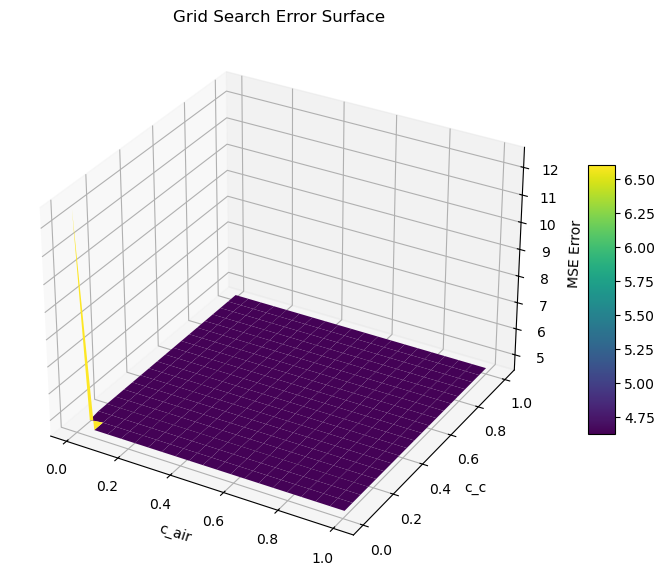

In [16]:
# Create meshgrid for plotting
C_air, C_c = np.meshgrid(c_air_list, c_c_list, indexing='ij')

# Plotting the 3D error surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(C_air, C_c, error_grid, cmap='viridis')

ax.set_xlabel('c_air')
ax.set_ylabel('c_c')
ax.set_zlabel('MSE Error')
ax.set_title('Grid Search Error Surface')

fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
plt.show()


In [17]:
# simulate theta_double_dot with the best parameters
c_air, c_c = best_parameters
print(best_params)
theta_dot = 0
theta = np.pi / 2  # Initial angle in radians
simulated_theta_d_dot_2 = np.zeros(len(acc_x_g))
for k in range(len(acc_x_g)):
    theta_double_dot = get_theta_double_dot(theta, theta_dot, c_air, c_c)
    simulated_theta_d_dot_2[k] = theta_double_dot
    theta_dot += theta_double_dot * dt[k]
    theta += theta_dot * dt[k]

(0.01, 0.06210526315789474)


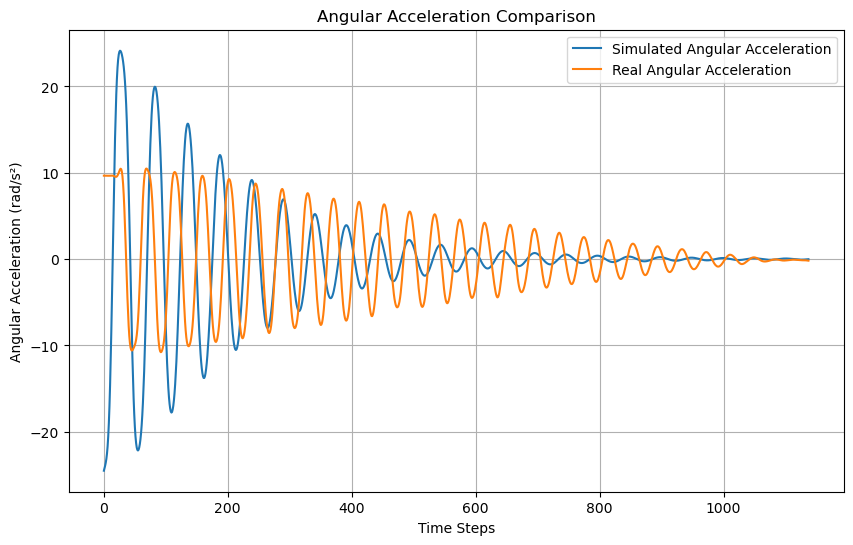

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(simulated_theta_d_dot_2, label='Simulated Angular Acceleration') 
plt.plot(real_theta_d_dot, label='Real Angular Acceleration')
plt.title('Angular Acceleration Comparison')
plt.xlabel('Time Steps')
plt.ylabel('Angular Acceleration (rad/s²)')
plt.legend()
plt.grid()
plt.show()

---

In [12]:
import numpy as np
from Digital_twin import DigitalTwin
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [13]:
digital_twin = DigitalTwin()
# digital_twin.get_theta_double_dot()
# Path to the CSV file

csv_file_path = '/Users/alishirazi/Desktop/Master SSE/Smart Systems/Group team/Smart-syetems-labs/theta.csv'
df = pd.read_csv(csv_file_path)
df_time = df['pcTime'][20:] 
df_theta = df['theta'][20:]

In [14]:
def find_initial_state(df_theta, df_time):
    # Find the initial condions of theta and theta_dot in the data
    theta = 92.0 * np.pi / 180  # Convert degrees to radians
    theta_dot = 0
    return theta, theta_dot

#Initial conditions based on the recorded data
theta, theta_dot = find_initial_state(df_theta, df_time)
#should be the same as your recording, sim_time is equal to total time of the recording
dt = 0.025  # Time step
sim_time = 0.025 * len(df_theta)  # Total time of the simulation

# Define improved parameter ranges with higher resolution
I_range = np.linspace(0.001, 0.4, 20)      # Reduced upper bound, increased resolution
c_c_range = np.linspace(0.001, 0.5, 40)    # Increased upper bound, increased resolution  
g = 9.81                                   # Gravity constant
mp_range = np.linspace(0.5, 2, 20)       # Expanded range in both directions, increased resolution


In [17]:


# Define parameter ranges
c_air_list = np.linspace(0.01, 1, 20)
c_c_list = np.linspace(0.01, 1, 20)
# dt = 0.025  # time step

# Define error function
def MSE(simulated, real):
    return np.sqrt(np.mean((simulated - real) ** 2))
# define error function
def err(simulated, real):
    return np.mean(np.abs((simulated - real)))

# Prepare for storing errors
error_grid = np.zeros((len(c_air_list), len(c_c_list)))
# real_theta_d_dot = acc_x_g  # From IMU, already in rad/s²

real_theta = np.array(df_theta)  # Real theta from the CSV file

best_error = float("inf")
best_parameters = (0, 0)

theta = -np.pi/2  # Initial angle in radians

def grid_search(c_air_values, c_c_values, theta, dt):
    global best_error, best_parameters, error_grid

    for i, c_air in enumerate(c_air_values):
        for j, c_c in enumerate(c_c_values):
            theta_dot = 0
            # simulated_theta_d_dot = np.zeros(len(acc_x_g))
            simulated_theta = []

            for _ in range(len(df_theta)):
                theta, _, _, _ = digital_twin.step()
                simulated_theta.append(theta)
            simulated_theta = np.array(simulated_theta)

            # for k in range(len(acc_x_g)):
            #     theta_double_dot = get_theta_double_dot(theta, theta_dot, c_air, c_c)
            #     simulated_theta_d_dot[k] = theta_double_dot

            #     theta_dot += theta_double_dot * dt[k]
            #     theta += theta_dot * dt[k]

            error = MSE(simulated_theta, real_theta)
            error_grid[i, j] = error

            if error < best_error:
                best_error = error
                best_parameters = (c_air, c_c)

    print(f"Best Parameters Found: c_air = {best_parameters[0]:.4f}, c_c = {best_parameters[1]:.4f}")
    print(f"Best Error: {best_error:.6f}")
    return best_parameters, error_grid, simulated_theta

# Run the search
best_params, error_grid, simulated_theta = grid_search(c_air_list, c_c_list, theta, dt)


Best Parameters Found: c_air = 0.0100, c_c = 0.0100
Best Error: 0.532676


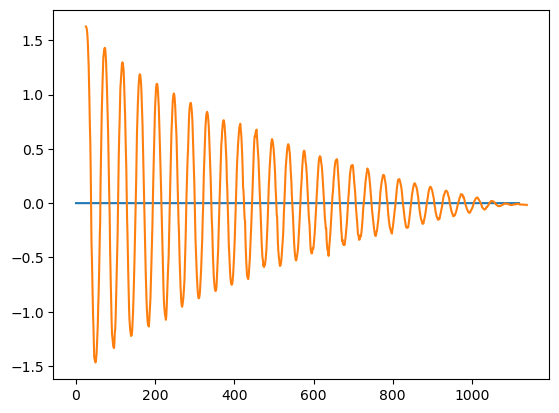

In [18]:
plt.plot(simulated_theta)
plt.plot(df_theta[5:])

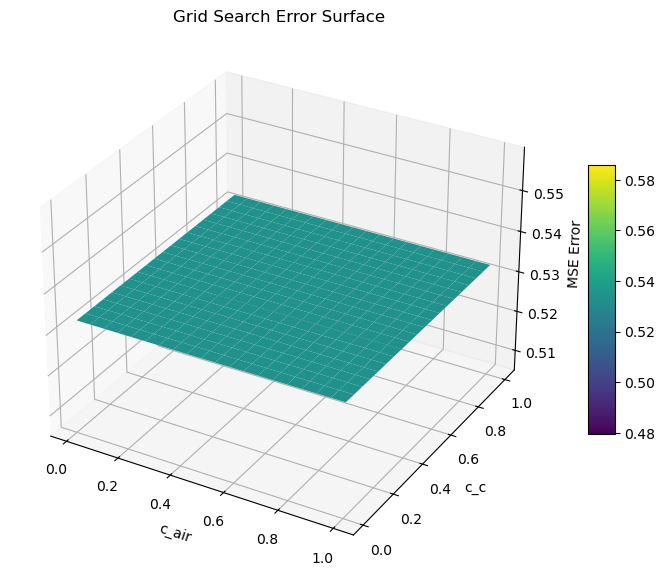

In [19]:
# Create meshgrid for plotting
C_air, C_c = np.meshgrid(c_air_list, c_c_list, indexing='ij')

# Plotting the 3D error surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(C_air, C_c, error_grid, cmap='viridis')

ax.set_xlabel('c_air')
ax.set_ylabel('c_c')
ax.set_zlabel('MSE Error')
ax.set_title('Grid Search Error Surface')

fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
plt.show()

----

----

In [56]:
import numpy as np
from Digital_twin import DigitalTwin
import pandas as pd

digital_twin = DigitalTwin()

# Path to the CSV file
csv_file_path = '/Users/alishirazi/Desktop/Master SSE/Smart Systems/Group team/Smart-syetems-labs/theta.csv'
df = pd.read_csv(csv_file_path)
df_time = df['pcTime'] 
df_theta = df['theta']

In [68]:
df_time = df['pcTime'][20:]
df_theta = df['theta'][20:]

In [ ]:
digital_twin.get_theta_double_dot(theta, theta_dot)

0.3697883131024889 1) found a better error
0.36977553161919385 2) found a better error
0.36976267582411 3) found a better error
0.3697497457574124 4) found a better error
0.3697367414641 5) found a better error
0.36972366299397685 6) found a better error
0.3697105104016317 7) found a better error
0.3696854831461301 8) found a better error
0.3696724457229991 9) found a better error
0.3696624949453032 10) found a better error
0.3696524548034202 11) found a better error
0.3696423254561013 12) found a better error
0.3696321070662791 13) found a better error
0.3696217998010413 14) found a better error
0.36961140383160274 15) found a better error
0.36960091933327643 16) found a better error
0.3695903464854441 17) found a better error
0.3695796854715257 18) found a better error
0.36956893647894806 19) found a better error
0.36955809969911285 20) found a better error
0.36955067220704224 21) found a better error
0.36953991765953953 22) found a better error
0.3695290759916846 23) found a better 

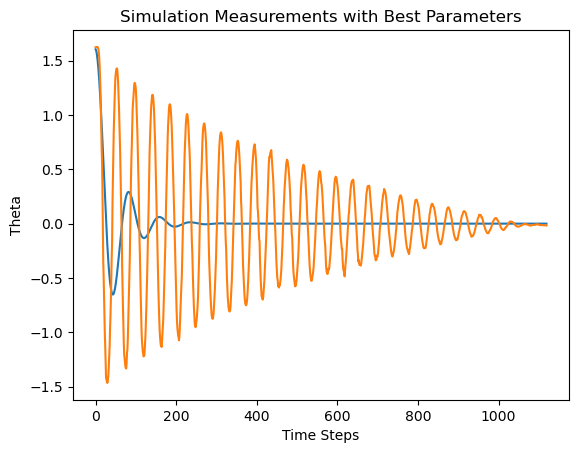

In [117]:

#Process dt_theta such that it is translated to radians.

def find_initial_state(df_theta, df_time):
    # Find the initial conditions of theta and theta_dot in the data
    # theta = df_theta[0]
    theta = 92.0 * np.pi / 180  # Convert degrees to radians
    theta_dot = 0
    return theta, theta_dot

#Initial conditions based on the recorded data
theta, theta_dot = find_initial_state(df_theta, df_time)
#should be the same as your recording, sim_time is equal to total time of the recording
delta_t = 0.025  # Time step
sim_time = 0.

# Define the ranges for each parameter and the 'resolution' of the search space
# c_air_range = np.linspace(0.01, 1, 20)  # Example range for c_air
# c_c_range = np.linspace(0.1, 2, 20)    # Example range for c_c
g = 9.81  # Assuming g is constant
# l_range = np.linspace(0.1, 0.5, 10)      # Example range for l

c_air_range = np.linspace(0.1, 0.4, 20)  # More realistic air friction
c_c_range = np.linspace(0.1, 0.4, 20)    # More realistic Coulomb friction
mp_range = np.linspace(0.1, 2, 20)       # Expanded range in both directions, increased resolution


c_air_range = np.linspace(best_params[0] - 0.05, best_params[0] + 0.05, 20)
c_c_range = np.linspace(best_params[1] - 0.05, best_params[1] + 0.05, 20)
mp_range = np.linspace(best_params[2] - 0.05, best_params[2] + 0.05, 20)

def error_metric(sim, real):
    return 1 - np.correlate(sim, real)[0]/(np.linalg.norm(sim)*np.linalg.norm(real))

def simulate_potential_model(theta, theta_dot, c_air, c_c, g, mp, theta_measurements):
    digital_twin.c_air = c_air
    digital_twin.c_c = c_c
    digital_twin.g = g
    digital_twin.mp = mp
    sim_measurements = []
    for i in range(len(theta_measurements)):
        theta_double_dot = digital_twin.get_theta_double_dot(theta, theta_dot)
        theta += theta_dot * delta_t
        theta_dot += theta_double_dot * delta_t
        sim_measurements.append(theta)
    error_2 = (np.abs(np.array(sim_measurements)-np.array(theta_measurements))).mean()
    # error = error_metric(sim_measurements, theta_measurements)
    # rmse = np.sqrt(np.mean((np.array(theta_measurements) - np.array(sim_measurements))**2))
    return error_2, sim_measurements

#example usage
exp_err = simulate_potential_model(np.pi-0.5, -0.1, 0.16, 1.1, 9.81, 0.3, df_theta)
# Initialize variables to store the best parameters and the lowest error found
best_params = None
lowest_error = float('inf')
i = 0

# Nested loops to go through each combination of parameters
for c_air in c_air_range:
        for c_c in c_c_range:
            for mp in mp_range:
                error,_ = simulate_potential_model(theta, theta_dot, c_air, c_c, g, mp, df_theta)
                if error < lowest_error:
                    lowest_error = error
                    i = i+1
                    print(error, f"{i}) found a better error")
                    best_params = (c_air, c_c, mp)

# calculate theta with the best parameters
theta_start, theta_dot_start = find_initial_state(df_theta, df_time)
error_best, sim_measurements_best = simulate_potential_model(theta_start, theta_dot_start, best_params[0], best_params[1], g, best_params[2], df_theta)

plt.plot(sim_measurements_best)
plt.plot(df_theta)
plt.title("Simulation Measurements with Best Parameters")
plt.xlabel("Time Steps")
plt.ylabel("Theta")

print("Best Parameters:", best_params)
print("Lowest Error:", lowest_error)
print("expected Error: ", exp_err)


0.8759906088308925


Text(0, 0.5, 'Theta')

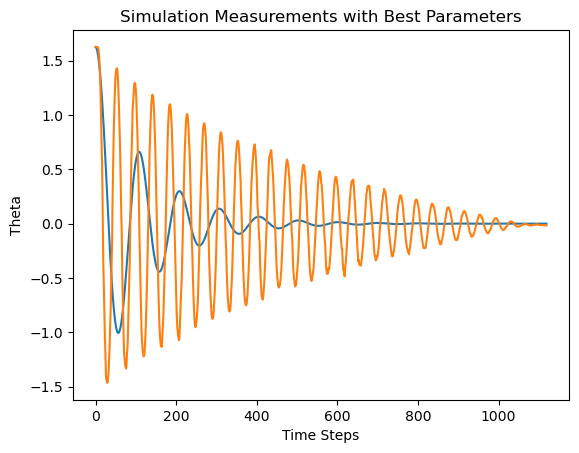

In [110]:
theta_best, theta_dot_best = find_initial_state(df_theta, df_time)
error_best, sim_measurements_best = simulate_potential_model(theta_best, theta_dot_best, 0.195, 0.195, g, 0.35, df_theta)
print(error_best)
plt.plot(sim_measurements_best)
plt.plot(df_theta)
plt.title("Simulation Measurements with Best Parameters")
plt.xlabel("Time Steps")
plt.ylabel("Theta")


New best: {'c_air': 0.001, 'c_c': 0.01, 'l': 0.2, 'mp': 0.2} | RMSE: 1.0732
New best: {'c_air': 0.001, 'c_c': 0.02, 'l': 0.2, 'mp': 0.2} | RMSE: 0.9641
New best: {'c_air': 0.001, 'c_c': 0.02, 'l': 0.2, 'mp': 0.2888888888888889} | RMSE: 0.9605
New best: {'c_air': 0.001, 'c_c': 0.03, 'l': 0.2, 'mp': 0.2} | RMSE: 0.8848
New best: {'c_air': 0.001, 'c_c': 0.03, 'l': 0.2, 'mp': 0.2888888888888889} | RMSE: 0.8793
New best: {'c_air': 0.001, 'c_c': 0.04, 'l': 0.2, 'mp': 0.2} | RMSE: 0.8259
New best: {'c_air': 0.001, 'c_c': 0.04, 'l': 0.2, 'mp': 0.2888888888888889} | RMSE: 0.8210
New best: {'c_air': 0.001, 'c_c': 0.05, 'l': 0.2, 'mp': 0.2} | RMSE: 0.7820
New best: {'c_air': 0.001, 'c_c': 0.05, 'l': 0.2, 'mp': 0.2888888888888889} | RMSE: 0.7774
New best: {'c_air': 0.001, 'c_c': 0.060000000000000005, 'l': 0.2, 'mp': 0.2} | RMSE: 0.7488
New best: {'c_air': 0.001, 'c_c': 0.060000000000000005, 'l': 0.2, 'mp': 0.2888888888888889} | RMSE: 0.7441
New best: {'c_air': 0.001, 'c_c': 0.060000000000000005, '

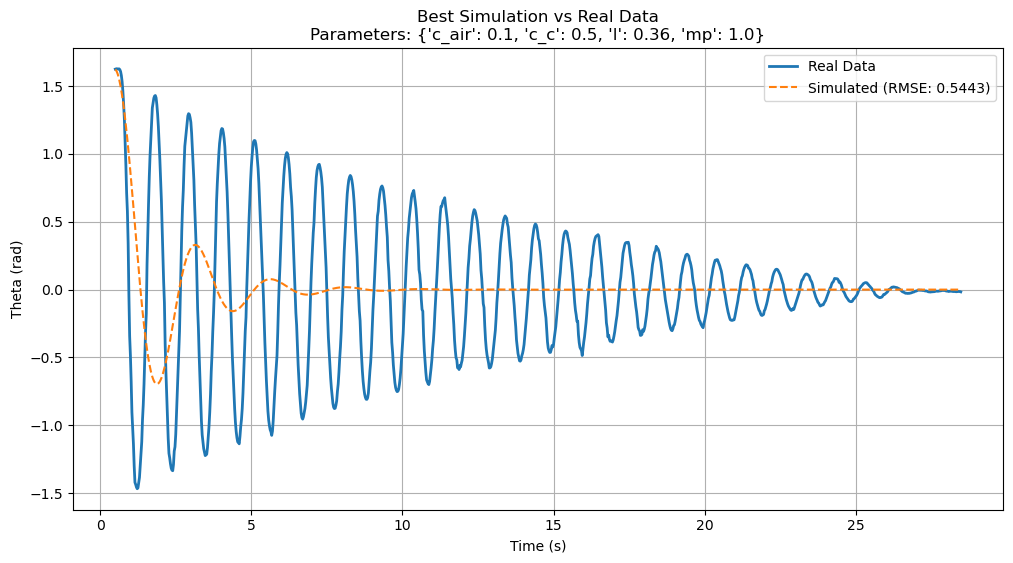


Best Parameters Found:
c_air: 0.1000
c_c: 0.5000
l: 0.3600
mp: 1.0000
Final RMSE: 0.5443


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
# from digital_twin import DigitalTwin  # Assuming you have this class

# Load your data (assuming df_theta is in radians)
df_theta = np.loadtxt('theta.csv', delimiter=',', skiprows=1, usecols=1)
df_time = np.arange(len(df_theta)) * 0.025  # Assuming 0.025s time step

df_theta = df_theta[20:]  # Skip first 20 rows
df_time = df_time[20:]  # Skip first 20 rows

def find_initial_state(df_theta, df_time):
    """Find initial conditions from the first few data points"""
    theta = df_theta[0]  # First measurement in radians
    theta_dot = (df_theta[1] - df_theta[0]) / (df_time[1] - df_time[0])  # Finite difference
    return theta, theta_dot

# Initialize digital twin
digital_twin = DigitalTwin()
delta_t = 0.025  # Must match your data sampling rate
sim_time = 0.

# More realistic parameter ranges based on physical systems
param_ranges = {
    'c_air': np.linspace(0.001, 0.1, 50),      # Air friction (0.001-0.1)
    'c_c': np.linspace(0.01, 0.5, 50),        # Coulomb friction (0.01-0.5)
    'mp': np.linspace(0.2, 1, 10),         # Mass of the pendulum (0.2-1kg)
}

def simulate_model(theta_init, theta_dot_init, params, theta_measurements):
    """Simulate with given parameters and return error metrics"""
    # Set parameters
    for name, value in params.items():
        setattr(digital_twin, name, value)
    
    # Simulation
    theta, theta_dot = theta_init, theta_dot_init
    sim_measurements = []
    
    for _ in range(len(theta_measurements)):
        theta_double_dot = digital_twin.get_theta_double_dot(theta, theta_dot)
        theta_dot += theta_double_dot * delta_t
        theta += theta_dot * delta_t
        sim_measurements.append(theta)
    
    # Multiple error metrics
    error = {
        'rmse': np.sqrt(np.mean((theta_measurements - sim_measurements)**2)),
        'correlation': np.corrcoef(theta_measurements, sim_measurements)[0,1],
        'phase_diff': np.argmax(signal.correlate(theta_measurements, sim_measurements)) - len(theta_measurements)
    }
    
    return error, sim_measurements

# Find best parameters using grid search
best_params = None
best_error = float('inf')
best_sim = None

# Get initial conditions from data
theta_init, theta_dot_init = find_initial_state(df_theta, df_time)

# Grid search
from itertools import product
param_combinations = product(*[param_ranges[name] for name in ['c_air', 'c_c', 'l', 'mp']])

for c_air, c_c, l, mp in param_combinations:
    params = {'c_air': c_air, 'c_c': c_c, 'l': l, 'mp': mp}
    error, sim_data = simulate_model(theta_init, theta_dot_init, params, df_theta)
    
    # Combined error metric (you can adjust weights)
    combined_error = error['rmse'] # - 10*error['correlation'] + 0.1*abs(error['phase_diff'])
    
    if combined_error < best_error:
        best_error = combined_error
        best_params = params
        best_sim = sim_data
        print(f"New best: {params} | RMSE: {error['rmse']:.4f}")
        # print(f"New best: {params} | RMSE: {error['rmse']:.4f} | Corr: {error['correlation']:.4f}")

# Results visualization
plt.figure(figsize=(12, 6))
plt.plot(df_time, df_theta, label='Real Data', linewidth=2)
plt.plot(df_time, best_sim, label=f'Simulated (RMSE: {best_error:.4f})', linestyle='--')
plt.title(f"Best Simulation vs Real Data\nParameters: {best_params}")
plt.xlabel('Time (s)')
plt.ylabel('Theta (rad)')
plt.legend()
plt.grid(True)
plt.show()

print("\nBest Parameters Found:")
for name, value in best_params.items():
    print(f"{name}: {value:.4f}")
print(f"Final RMSE: {best_error:.4f}")

In [109]:
import pandas as pd
import numpy as np
from itertools import product
from sklearn.metrics import mean_squared_error
# from Digital_twin import DigitalTwin

# --- Load your filtered theta & theta_dot ---
df = pd.read_csv("theta.csv")
df['theta_rad'] = (df['theta'] / 2048.0) * np.pi
theta_true = df['theta'].values
# theta_dot_true = df['theta_dot_kalman'].values
n_steps = len(theta_true)

# --- Define parameters to optimize ---
param_grid = {
    "M": np.linspace(0.3, 2, 10),
    "C": np.linspace(0.01, 0.5, 10),
    
    # "k": np.linspace(0.01, 0.03, 3),        # ← Uncomment to include k
    # "a_m": np.linspace(0.3, 0.7, 3),        # ← Uncomment to include a_m
    # "R_pulley": [0.01],                     # ← Fixed param example
}

# --- Initial states ---
theta_init = theta_true[0]
theta_dot_init = 0 # theta_dot_true[0]

# --- Set constant values ---
const_params = {
    "k": 0,
    "a_m": 0,
    "l": 0.35,
    "R_pulley": 0.01,
}

# --- Generate grid dynamically ---
keys = list(param_grid.keys())
combinations = list(product(*param_grid.values()))

best_rmse = float('inf')
best_config = {}
best_theta_sim = []

for values in combinations:
    params = dict(zip(keys, values))

    model = DigitalTwin()

    # Set fixed and dynamic parameters
    for name, val in const_params.items():
        setattr(model, name, val)
    for name, val in params.items():
        setattr(model, name, val)

    # Derived values
    M = params.get("M", 1.0)
    model.mp = 0.7 * M
    model.mc = 0.3 * M
    C = params.get("C", 0.1)
    model.c_air = C / 2
    model.c_c = C / 2
    model.I = (1 / 3) * model.mp * model.l**2

    # Initial state
    model.theta = theta_init
    model.theta_dot = theta_dot_init

    # Simulate
    theta_sim = []
    for _ in range(n_steps):
        theta, _, _, _ = model.step()
        theta_sim.append(theta)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(theta_true, theta_sim))

    if rmse < best_rmse:
        best_rmse = rmse
        best_config = params.copy()
        best_theta_sim = theta_sim.copy()

# --- Print result ---
print("✅ Best Parameters:")
for k, v in best_config.items():
    print(f"{k} = {v:.5f}")
print(f"RMSE = {best_rmse:.6f}")

✅ Best Parameters:
M = 0.30000
C = 0.39111
RMSE = 0.519095
